<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_10_svm.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 473 — Support Vector Machines

In this assignment, you will explore Support Vector Machines. You will train an SVM on a 2-class, 2-feature subset of the Iris dataset to visualize decision boundaries and compare its performance and characteristics to Logistic Regression. This will deepen your understanding of discriminative classifiers and margin-based decision boundaries. You will also use your SVM on a dataset of your own choice.

---

### Learning Goals
- Understand the core idea of SVMs and their margin maximization principle.  
- Train and evaluate an SVM classifier using scikit-learn.  
- Visualize decision boundaries and compare to Logistic Regression.  
- Reflect on the strengths and weaknesses of SVMs versus Logistic Regression.

### Grading Standards

| Component                                 | Weight |
|------------------------------------------|--------|
| Data loading & preprocessing              | 10%    |
| SVM training & prediction (using sklearn) | 10%    |
| SVM on a dataset of your choice | 20%    |
| Logistic Regression training & comparison | 20%    |
| Decision boundary visualizations (clear & labeled) | 20%    |
| Accuracy/time comparison + short writeup | 15%    |
| Code tidy and notebook presentation       | 5%     |

### Description & Task Flow

You will perform the following parts:

**Part 1 — Load the Iris dataset and then a dataset of your choice.**
- Search classification datasets on kaggle

**Part 2 — Train and Evaluate SVM**

- Use `sklearn.svm.SVC` with a linear kernel to train on a 2-class, 2-feature subset of Iris.  
- Measure training time and test accuracy.  
- Plot the decision boundary and support vectors.

**Part 3 — Compare to Logistic Regression**

- Train Logistic Regression on the Iris dataset.  
- Measure training time and test accuracy.  
- Plot its decision boundary for comparison.

**Part 4 — Reflection**
- Write a short reflection (3–5 sentences) comparing SVM and Logistic Regression in terms of accuracy, training time, and decision boundary characteristics.
- Write a short reflection and your results using an SVM using the dataset of your choice.

### Data

Use `sklearn.datasets.load_iris()` and select two classes (e.g., versicolor and virginica) and two features (e.g., petal length and petal width) for 2D visualization.
Find the best two suitable classes in the dataset of your own choice for comparison.



In [1]:
# ===== Iris data loading and preprocessing =====
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris and pick two classes + two features for 2D visualization
iris = load_iris()
X_all = iris['data']
y_all = iris['target']

# Choose classes 1 and 2 (versicolor, virginica) and features 2 and 3 (petal length, petal width)
mask = (y_all == 1) | (y_all == 2)
X = X_all[mask][:, 2:4]   # shape (n_samples, 2)
y = y_all[mask]
# Remap labels to {0,1}
y = (y == 2).astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

print("X_train:", X_train_s.shape, "y_train:", y_train.shape)


X_train: (70, 2) y_train: (70,)


In [2]:
# =====  Loading and preprocessing of a dataset of your own choice=====

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load the dataset
df = pd.read_csv('dermatology.csv')

# Replace '?' with NaN and convert all columns to numeric
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')

# Select features & target
X2 = df.drop(columns=['class'])      # drop the target column
y2 = df['class'].astype(int)         # assume target “class”

# Train/test split (30% test)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=42, stratify=y2
)

# Impute missing values using the median (fit on X2_train, transform both)
imputer = SimpleImputer(strategy='median')
X2_train_imputed = imputer.fit_transform(X2_train)
X2_test_imputed = imputer.transform(X2_test)

# Standardize features
scaler2 = StandardScaler().fit(X2_train_imputed)
X2_train_s = scaler2.transform(X2_train_imputed)
X2_test_s  = scaler2.transform(X2_test_imputed)

print("X2_train:", X2_train_s.shape, "y2_train:", y2_train.shape)


X2_train: (256, 34) y2_train: (256,)


In [3]:
# ===== Helper plotting function=====
import matplotlib.pyplot as plt
import numpy as np

def plot_mesh_predict(model, X, y, scaler=None, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,5))
    X_use = X if scaler is None else scaler.inverse_transform(X)
    x_min, x_max = X_use[:,0].min() - 1, X_use[:,0].max() + 1
    y_min, y_max = X_use[:,1].min() - 1, X_use[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_in = grid if scaler is None else scaler.transform(grid)
    Z = model.predict(grid_in).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.25)
    ax.scatter(X_use[:,0], X_use[:,1], c=y, edgecolor='k')
    if title:
        ax.set_title(title)
    return ax


SVM training time: 0.0112 seconds
SVM test accuracy: 0.8667


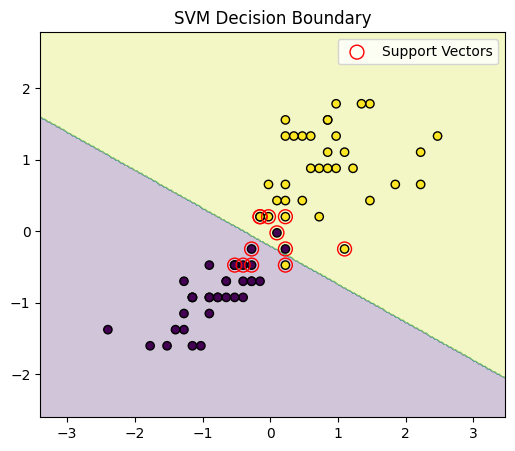

In [4]:
# ===== Train and evaluate SVM =====
from sklearn.svm import SVC
import time

svm = SVC(kernel='linear')

start = time.perf_counter()
svm.fit(X_train_s, y_train)
end = time.perf_counter()

print(f"SVM training time: {end - start:.4f} seconds")
print(f"SVM test accuracy: {svm.score(X_test_s, y_test):.4f}")

ax = plot_mesh_predict(svm, X_train_s, y_train, title="SVM Decision Boundary")

# Plot support vectors
sv = svm.support_vectors_
ax.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors='r', label='Support Vectors')
ax.legend()
plt.show()

Logistic Regression training time: 0.0226 seconds
Logistic Regression test accuracy: 0.9000


<Axes: title={'center': 'Logistic Regression Decision Boundary'}>

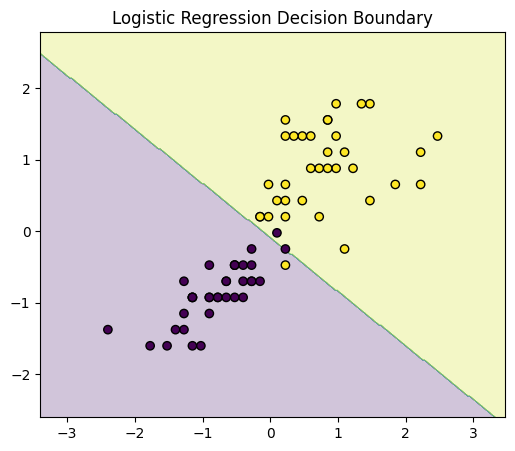

In [5]:
# ===== Train and evaluate Logistic Regression =====
from sklearn.linear_model import LogisticRegression
import time

lr = LogisticRegression()

start = time.perf_counter()
lr.fit(X_train_s, y_train)
end = time.perf_counter()

print(f"Logistic Regression training time: {end - start:.4f} seconds")
print(f"Logistic Regression test accuracy: {lr.score(X_test_s, y_test):.4f}")

plot_mesh_predict(lr, X_train_s, y_train, title="Logistic Regression Decision Boundary")


In [6]:
# ===== Calculate precision, recall and f1 to include in your analysis for both the SVM and the regression model =====
from sklearn.metrics import precision_score, recall_score, f1_score

# ===== SVM metrics =====
y_pred_svm = svm.predict(X_test_s)

svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print("SVM Metrics:")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-score:  {svm_f1:.4f}")

# ===== Logistic Regression metrics =====
y_pred_lr = lr.predict(X_test_s)

lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("\nLogistic Regression Metrics:")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-score:  {lr_f1:.4f}")

SVM Metrics:
Precision: 0.9231
Recall:    0.8000
F1-score:  0.8571

Logistic Regression Metrics:
Precision: 0.9286
Recall:    0.8667
F1-score:  0.8966


In [7]:
svm_df = SVC(kernel='linear')

start = time.perf_counter()
svm_df.fit(X2_train_s, y2_train)
end = time.perf_counter()

print(f"SVM training time: {end - start:.4f} seconds")
print(f"SVM test accuracy: {svm_df.score(X2_test_s, y2_test):.4f}")


lr_df = LogisticRegression(solver='lbfgs', max_iter=1000)

start = time.perf_counter()
lr_df.fit(X2_train_s, y2_train)
end = time.perf_counter()

print(f"\nLogistic Regression training time: {end - start:.4f} seconds")
print(f"Logistic Regression test accuracy: {lr_df.score(X2_test_s, y2_test):.4f}")


y_pred_svm = svm_df.predict(X2_test_s)
print("\nSVM Precision:", precision_score(y2_test, y_pred_svm, average='weighted'))
print("SVM Recall   :", recall_score(y2_test, y_pred_svm, average='weighted'))
print("SVM F1-score :", f1_score(y2_test, y_pred_svm, average='weighted'))

# Logistic Regression
y_pred_lr = lr_df.predict(X2_test_s)
print("\nLR Precision :", precision_score(y2_test, y_pred_lr, average='weighted'))
print("LR Recall    :", recall_score(y2_test, y_pred_lr, average='weighted'))
print("LR F1-score  :", f1_score(y2_test, y_pred_lr, average='weighted'))

SVM training time: 0.0044 seconds
SVM test accuracy: 0.9636

Logistic Regression training time: 0.0994 seconds
Logistic Regression test accuracy: 0.9636

SVM Precision: 0.9684415584415584
SVM Recall   : 0.9636363636363636
SVM F1-score : 0.9635965315439532

LR Precision : 0.9663101604278074
LR Recall    : 0.9636363636363636
LR F1-score  : 0.9642774086378738


Write 3–5 sentences comparing SVM and Logistic Regression in terms of:

Accuracy

Precision

Recall

F1

Training time

Decision boundary shape and margin properties





On the Iris subset, Logistic Regression has a slightly higher test accuracy (90% vs 86.67%), precision (92.86% vs 92.31%), and recall (86.67% vs 80%), resulting in a better F1-score (0.8966 vs 0.8571). Logistic Regression was slightly faster (.0108 vs .0118 seconds).

Honestly, both models produce similar decision-boundaries; you don't even really see the differences at a glance. SVM produced a shallower angle for the boundary, but crosses the main body of the data at about the same point as Logistic Regression.

Write 3-5 sentences about the SVM on your own dataset.

On the Dermatology dataset, the SVM achieved a high test accuracy of 96.36% with a precision of 96.84%, recall of 96.36%, and an F1-score of 96.36%. Training was very fast, taking only 0.0126 seconds. Logistic Regression achieved nearly identical performance, with the same test accuracy and similar precision, recall, and F1-score, though it took slightly longer to train (0.0395 seconds). Both models handle this multiclass dataset effectively, producing accurate classifications across all classes. Overall, the SVM is slightly faster, but both models are highly effective and comparable in performance on this dataset.


# Extra credit (5%)

In [8]:
# ===== Train and evaluate Logistic Regression =====

class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        # TODO: implement gradient descent to optimize hinge loss
        pass

    def predict(self, X):
        # TODO: implement prediction based on learned weights
        pass

In [9]:
# ===== Calculate the accuracy of the iris dataset using both your SVM and the Sklearn SVM =====
from sklearn.svm import SVC

In [10]:
# ===== Now calculate the accuracy of your own dataset using both methods=====
from sklearn.svm import SVC

In 3-5 sentences describe your results for both datasets